In [152]:
import numpy as np
np.random.seed(42)
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from chainconsumer import ChainConsumer
import plotly.graph_objects as go
from scipy.stats import multivariate_normal as mn

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [153]:
data = pd.read_csv("data\diabetes.csv")
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

Bascic Exploration and cleanup

In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


viewing more details about the data

In [155]:
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

dealing with missing values

In [156]:
#using isnsull() function
print(data.isnull().any().sum())
print(data.isnull().sum())

0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [157]:
# dropping the insulin column because it has large number of missing values
data = data.drop('Insulin', axis=1)

In [158]:
#dropping all the rows that contain missing values
data = data.dropna()

In [159]:
data.shape

(768, 8)

zero values that dont make sense


In [160]:
data = data[~(data[data.columns[1 :-1]] == 0).any(axis=1)]
data.shape

(532, 8)

Summary Information

Code to display table borders 

In [161]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th{
    border :1px white solid !important;
    color : white !important;
}
</style>

In [26]:
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness         BMI  \
count   532.000000  532.000000     532.000000     532.000000  532.000000   
mean      3.516917  121.030075      71.505639      29.182331   32.890226   
std       3.312036   30.999226      12.310253      10.523878    6.881109   
min       0.000000   56.000000      24.000000       7.000000   18.200000   
25%       1.000000   98.750000      64.000000      22.000000   27.875000   
50%       2.000000  115.000000      72.000000      29.000000   32.800000   
75%       5.000000  141.250000      80.000000      36.000000   36.900000   
max      17.000000  199.000000     110.000000      99.000000   67.100000   

       DiabetesPedigreeFunction         Age     Outcome  
count                532.000000  532.000000  532.000000  
mean                   0.502966   31.614662    0.332707  
std                    0.344546   10.761584    0.471626  
min                    0.085000   21.000000    0.000000  
25%                    0.258750   23.000000    0.000000  
50%                    0.416000   28.000000    0.000000  
75%                    0.658500   38.000000    1.000000  
max                    2.420000   81.000000    1.000000

In [162]:
#check the mean of the values depending on their category (i.e 0 or 1)
data.groupby('Outcome').mean()

Pregnancies     Glucose  BloodPressure  SkinThickness        BMI  \
Outcome                                                                     
0           2.926761  110.016901      69.912676      27.290141  31.429577   
1           4.700565  143.118644      74.700565      32.977401  35.819774   

         DiabetesPedigreeFunction        Age  
Outcome                                       
0                        0.446315  29.222535  
1                        0.616588  36.412429

In [163]:
data.groupby('Outcome').agg(['mean', 'median'])

Pregnancies            Glucose        BloodPressure         \
               mean median        mean median          mean median   
Outcome                                                              
0          2.926761      2  110.016901    106     69.912676     70   
1          4.700565      4  143.118644    144     74.700565     74   

        SkinThickness               BMI        DiabetesPedigreeFunction  \
                 mean median       mean median                     mean   
Outcome                                                                   
0           27.290141     27  31.429577   30.9                 0.446315   
1           32.977401     32  35.819774   34.6                 0.616588   

                      Age         
        median       mean median  
Outcome                           
0        0.368  29.222535     25  
1        0.542  36.412429     35

Useful and informative Plots 

Histogram Plots

C:\Users\aroos\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\aroos\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\aroos\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\aroos\anaconda3\lib\site-pac

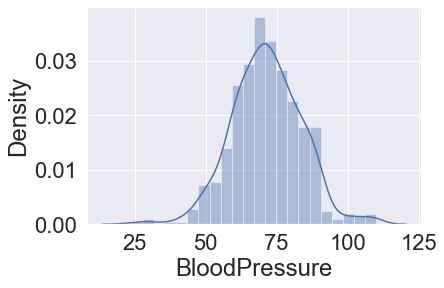

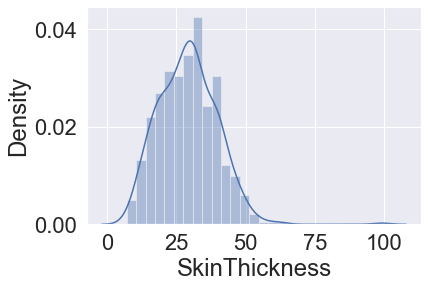

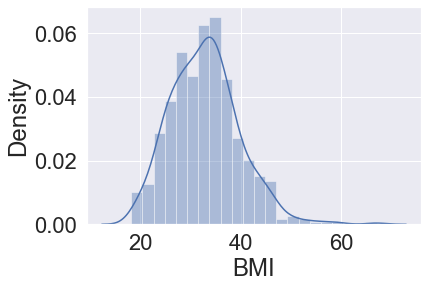

In [164]:
for i, col in enumerate(data.columns[:-1]):
    plt.figure(i)
    sns.distplot(data[col]);

Scatter Matrix

It only allows to work with numeric data. For categorical  data, categories should be converted to numeric labels.


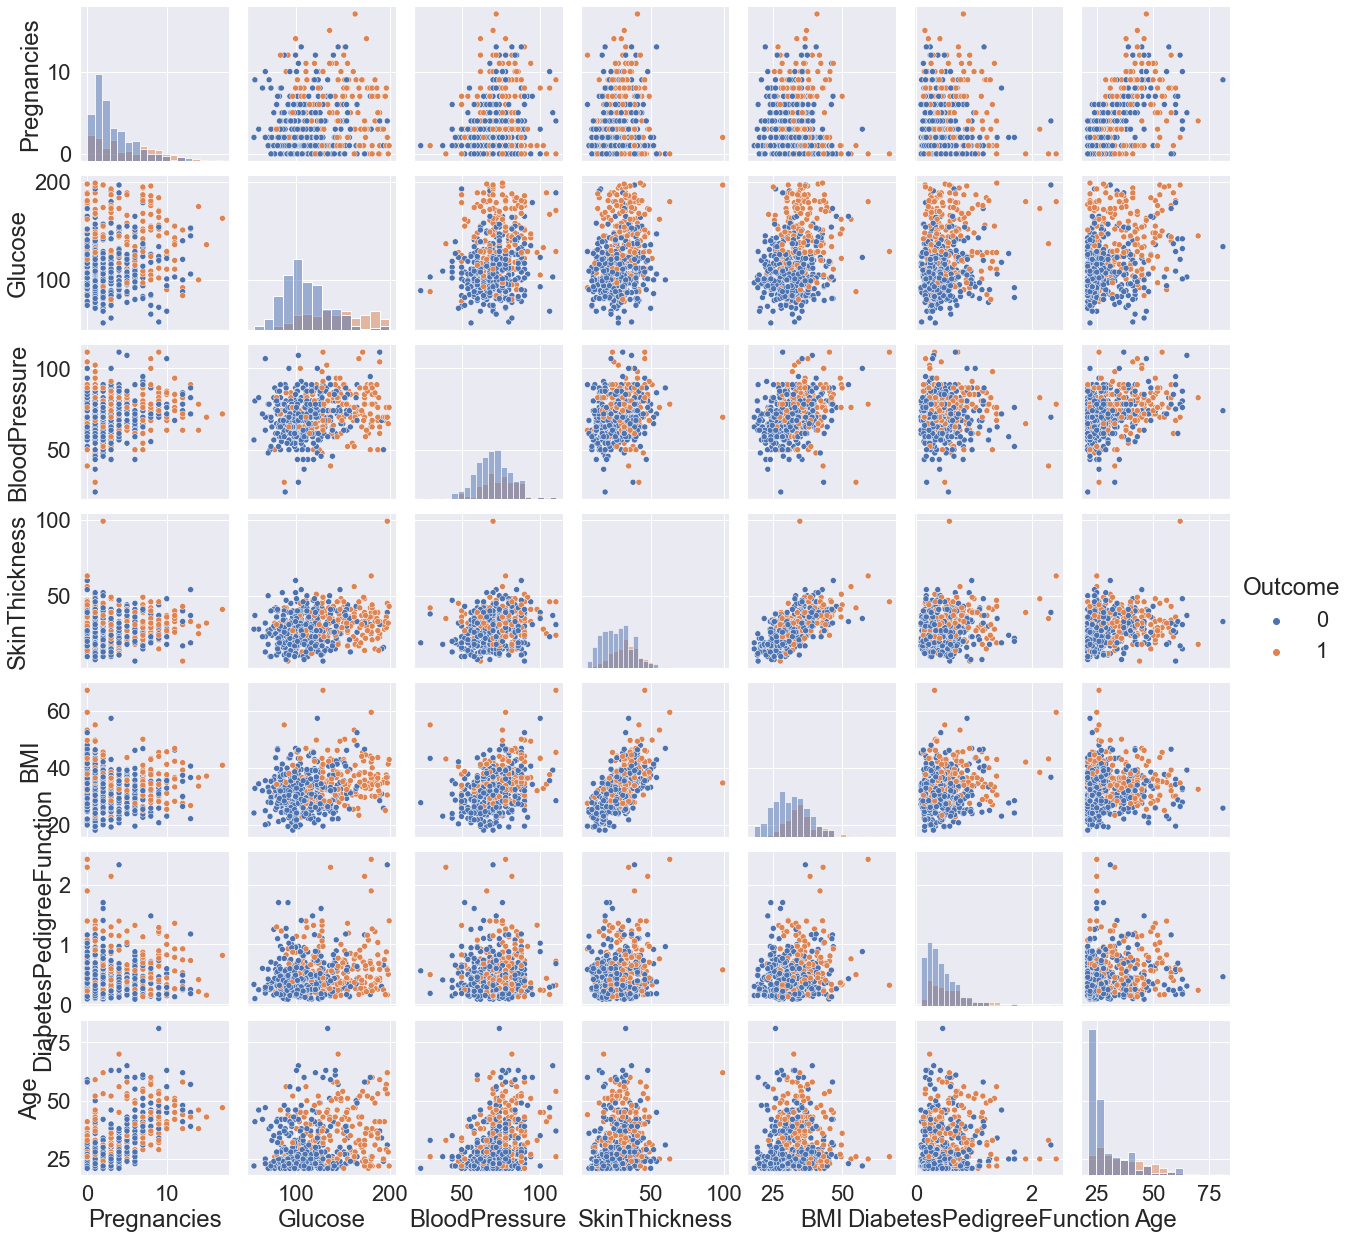

In [165]:
sns.pairplot(data, hue = "Outcome", diag_kind = 'hist');
plt.savefig('figure_11.png')
# fig.write_html("scatter.html")


The scatter plot gives us the histogram for the distributions along the diagnol and a lot of 2D scatter plots off-diagnol.
Some variables have a lot of scatter and some are correlated i.e there is a direction in their scatter which leads us to correlation plots

Correlation Plots
It is usually an indication of good information content. For analysis we will be using variables that are correlated with the outcome variable.


In [166]:
data.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.125330       0.204663       0.095085   
Glucose                      0.125330  1.000000       0.219178       0.226590   
BloodPressure                0.204663  0.219178       1.000000       0.226072   
SkinThickness                0.095085  0.226590       0.226072       1.000000   
BMI                          0.008576  0.247079       0.307357       0.647422   
DiabetesPedigreeFunction     0.007435  0.165817       0.008047       0.118636   
Age                          0.640747  0.278907       0.346939       0.161336   
Outcome                      0.252586  0.503614       0.183432       0.254874   

                               BMI  DiabetesPedigreeFunction       Age  \
Pregnancies               0.008576                  0.007435  0.640747   
Glucose                   0.247079                  0.165817  0.278907   
BloodPressure             0.307357                  0.008047  0.346939   
SkinThickness             0.647422                  0.118636  0.161336   
BMI                       1.000000                  0.151107  0.073438   
DiabetesPedigreeFunction  0.151107                  1.000000  0.071654   
Age                       0.073438                  0.071654  1.000000   
Outcome                   0.300901                  0.233074  0.315097   

                           Outcome  
Pregnancies               0.252586  
Glucose                   0.503614  
BloodPressure             0.183432  
SkinThickness             0.254874  
BMI                       0.300901  
DiabetesPedigreeFunction  0.233074  
Age                       0.315097  
Outcome                   1.000000

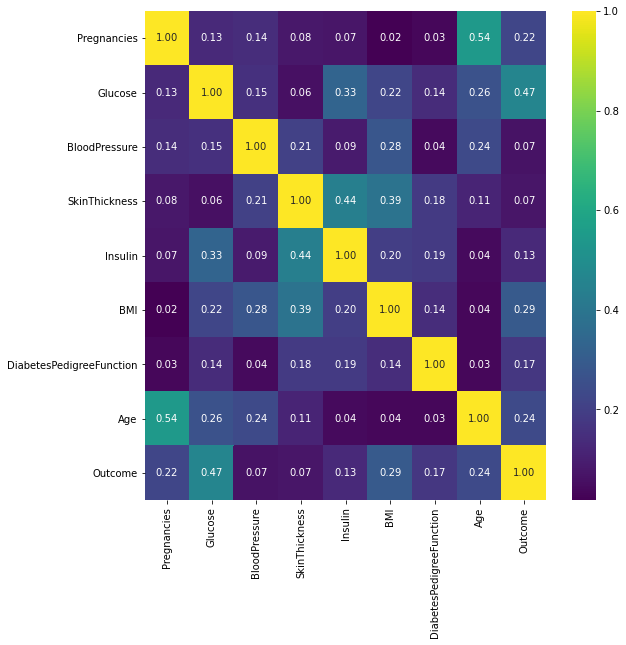

In [28]:
plt.figure(figsize= (9,9))
sns.heatmap(np.abs(data.corr()) , annot = True, cmap = "viridis" , fmt = "0.2f");
plt.savefig('figure_2.png')

We can see from this figure , allows us to point out the most  correlated and anti-correlated attributes. Some might just be a commom sense like Pregnancy vs Age but other might gives us real insight into the data.
It allows us to see what we need to investigate and which varaibles we can focus on if we do not have the time and resources to investigate every possible column

Box Plots, Bee Swarm Plots


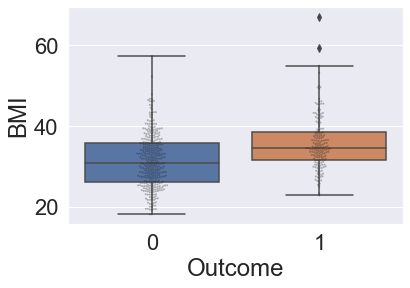

In [167]:
sns.boxplot(x = "Outcome", y = 'BMI', data = data, whis= 3.0);
sns.swarmplot(x = "Outcome", y = 'BMI', data=data, size=2, color="k", alpha=0.3);

Scatter Plot

A scatter plot is fairly informative and fast to plot.

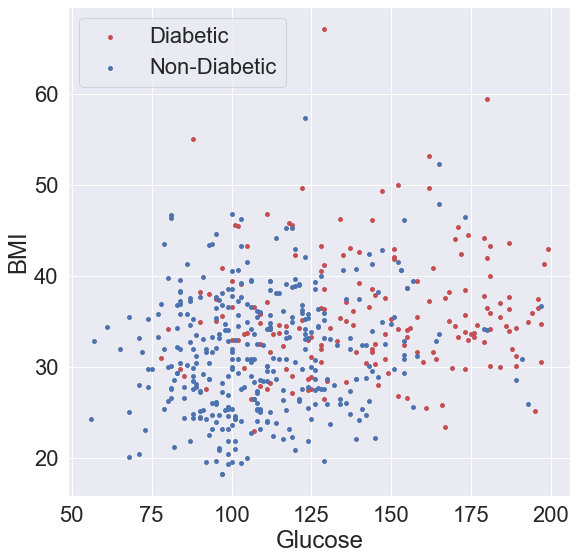

In [168]:
plt.figure(figsize = (9, 9))

m = data['Outcome'] == 1
plt.scatter(data.loc[m, 'Glucose'], data.loc[m, 'BMI'], c ='r', s= 15, label= 'Diabetic')
plt.scatter(data.loc[~m, 'Glucose'], data.loc[~m, 'BMI'], c ='b', s= 15, label= 'Non-Diabetic')
plt.xlabel("Glucose")
plt.ylabel("BMI")
plt.legend(loc=2)

Some useful information can be extracted by looking at the scatter plot above. Given the level of glucose and  BMI of a random person we can guess whether he is diabetic or not.

Probabilistic Analysis

Based on the previous correlation plot, a simple approach might be just to use the top correlated variables and investigate them further.

In our case we have selected Glucose, BMI and Age.

'Pregnancies' are not included because we are not paying attention to gender.

'Diabetes Pedigree function' is not included because we dont expect patients to know its value when they come to clinic.


In [169]:
data = pd.read_csv("data\diabetes.csv")
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [35]:
# data = data[["Glucose", "BMI", "Outcome", "Age"]]

In [170]:
data.shape

(768, 9)

In [171]:
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [172]:
from skimage import io
from skimage import filters

In [173]:
# Splitting data into two dataframes i.e diabetic and non-diabetic
df_y = data.loc[(data["Outcome"] == 1),["Glucose", "BMI", "Age"]]
df_n = data.loc[(data["Outcome"] == 0), ["Glucose", "BMI", "Age"]]



In [174]:
# create an interactive 3D plot using the two subdatasets
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=df_y['Glucose'], y=df_y['BMI'], z=df_y['Age'], mode = 'markers', name = 'Diabetic'))
fig.add_trace(go.Scatter3d(x=df_n['Glucose'], y=df_n['BMI'], z=df_n['Age'], mode = 'markers', name = 'Non-Diabetic'))
# plt.savefig('3dimage.png')
fig.show()
fig.write_html("img.html")

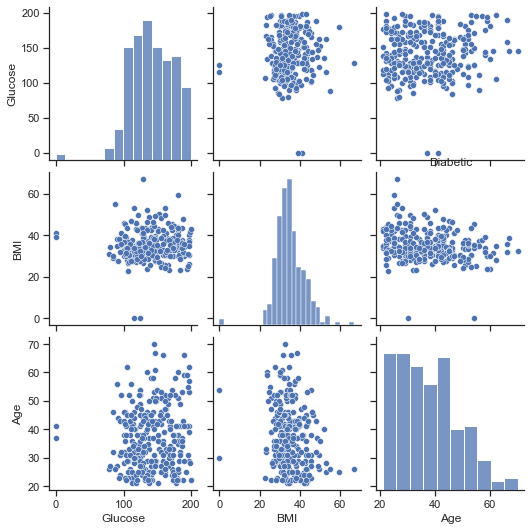

In [175]:
#scatter matrix for Diabetic subdataset
sns.set(style = "ticks")
sns.pairplot(df_y, diag_kind = 'hist');
plt.title("Diabetic")
plt.savefig('diabetic.png')

In [176]:
#scatter matrix for non-diabetic subdataset
sns.set(style = "ticks")
sns.pairplot(df_n, diag_kind = 'hist');
plt.title("Non- Diabetic")
plt.savefig('non-diabetic.png', dpi=300)

Multivariate Normal Distribution

This allows us to model Glucose, BMI and Age as normal three dimensions rather than three independent normals. This way we can see the correlation between them.


In [177]:
df_n.shape

(500, 3)

Plotting the data in 3D and add a test point


In [178]:
# test point for any random patient
test_point = [110, 35, 52]

# adding test points
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=df_y['Glucose'], y=df_y['BMI'], z=df_y['Age'], mode = 'markers', name = 'Diabetic'))
fig.add_trace(go.Scatter3d(x=df_n['Glucose'], y=df_n['BMI'], z=df_n['Age'], mode = 'markers', name = 'Non-Diabetic'))
fig.add_trace(go.Scatter3d(x=[test_point[0]], y=[test_point[1]], z=[test_point[2]], mode = 'markers', name = 'Non-Diabetic'))

fig.show()
# fig.write_html("3d.html")

In [179]:
# take each subdataset seperately and fit a multivariable normal PDF to it
# use the PDF to predict the probability of our test points (diabetis or non-diabetic)
prob_test = []
for d in [df_y, df_n]:
    # calculating the mean of our subdataset
    mean = np.mean(d)
    #calculating the covariance of our subdataset
    cov = np.cov(d, rowvar=0)
# basically we pass the points to pdf and say evaluate it using this mean and covaraince
prob = mn.pdf(test_point, mean , cov)
prob_test.append(prob)

In [180]:
#computing the weighted probability of the test point being positive (Diabetic)
num_y = df_y.shape[0]
num_n= df_n.shape[0]
print("Number of Diabetic patients is : ", num_y)
print("Number of Non-Diabetic patients is : ", num_n)
prob_diagnosis = num_y * prob_test[0] / (num_y * prob_test[0] + num_n * prob_test[1])
print(f"Positive diagnosis chance is {100 * prob_diagnosis: 2f} %")

Number of Diabetic patients is :  268
Number of Non-Diabetic patients is :  500


IndexError: list index out of range

Notice how the probability is weighted.The weighting is done to account for the imbalance(non-diabetic patients are more in number as compared to diabetic patients)

We can only directly compare distributions if we have equal probability i.e same number of people with or without diabetes. This is rarely the case so we have to weight them.



Predicting Diabetes with Logistic Regression

Logistic Regression measures the value relationship between the dependent variable (in this case 'Outcome' or what we want to predict) and independent variable(in this case our features or input variables), by estimating probabilities using its underlying logistic function

These probabilities are then transformed into binary values in order to actually make a prediction.

This is the task of logistic function , also called the sigmoid function

The Sigmoid-Function is an S-shaped curve that can take any real valued number and map it into a value between the range of 0 and 1 , but never exactly at those limits 

The values between 0 and 1 will then be transformed into either 0 or 1 using a threshold classifier

In [181]:
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [182]:
data= data[["Glucose", "BMI", "Age", "Outcome"]]
data.head()
data.to_csv('data.csv')

In [183]:
# saving values of input variables in X and values of outcome variables in y
X , y = data.values[:, : -1], data.values[:, -1]

In [184]:
#split the data randomly into two sets : training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size= 0.01, random_state= 42, stratify=y )

In [185]:
# fit the model in the training data
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [186]:
# Evaluate the model using the test data
accuracy = model.score(X_test, y_test)
print("accuracy = ", accuracy * 100, "%")

accuracy =  75.0 %


Interpreting the model

To have a better view of logistic regression model,we can visualize how our model uses features and which features have greater  effect on outcome. 

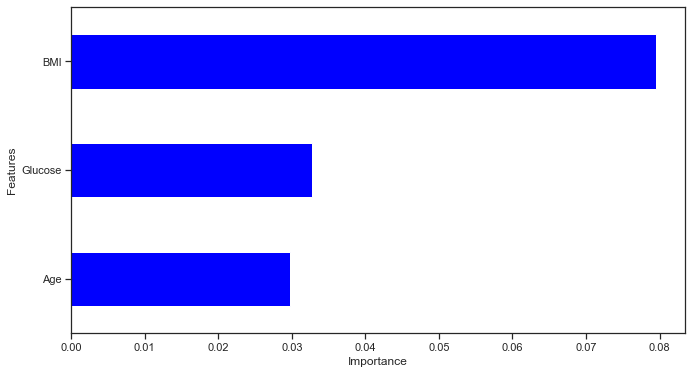

In [188]:
coeff = list(model.coef_[0])
labels = data.columns[:-1]
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace = True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace = True)
features.importance.plot(kind= 'barh', figsize = (11,6), color = features.positive.map({True: 'blue', False : 'red'}))
plt.xlabel('Importance');
# plt.savefig('barchart.png')

In [189]:
features

importance  positive
Features                      
Age         0.029770      True
Glucose     0.032744      True
BMI         0.079468      True

All the three features have great influence on the prediction i.e their higher values are correlated with a person being diabetic. 

Correlation indicates that Glucose is more correlated than BMI to the Outcome, the model relies more on BMI. There may be several reasons , including the fact that correlation captured by Glucose is also captured by some other variables, whereas the information captured by BMI is not captured by other variables.


In [191]:
data = pd.read_csv("data\diabetes.csv")
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [193]:
data.sample(frac=1)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
20             3      126             88             41      235  39.3   
543            4       84             90             23       56  39.5   
456            1      135             54              0        0  26.7   
528            0      117             66             31      188  30.8   
335            0      165             76             43      255  47.9   
..           ...      ...            ...            ...      ...   ...   
183            5       73             60              0        0  26.8   
137            0       93             60             25       92  28.7   
132            3      170             64             37      225  34.5   
80             3      113             44             13        0  22.4   
562            1       87             68             34       77  37.6   

     DiabetesPedigreeFunction  Age  Outcome  
20                      0.704   27        0  
543                     0.159   25        0  
456                     0.687   62        0  
528                     0.493   22        0  
335                     0.259   26        0  
..                        ...  ...      ...  
183                     0.268   27        0  
137                     0.532   22        0  
132                     0.356   30        1  
80                      0.140   22        0  
562                     0.401   24        0  

[768 rows x 9 columns]

In [195]:
#split the data
X= data.drop("Outcome", axis=1)

y= data["Outcome"]
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2)

(len(X_train),len(X_test))

(614, 154)

We are going to train our model on 4 algorithms

1. Logistic Regression

2. KNN

3. Random Forest Classifier


4. Support Vector Machine



In [196]:
# Build Logistic Regression Model
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_train, y_train);

#Evaluate the model
log_reg = log_reg.score(X_test, y_test)
print(log_reg)

0.7662337662337663
C:\Users\aroos\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [198]:
# Build KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train);

#Evaluate the model
knn = knn.score(X_test, y_test)
print(knn)

0.7597402597402597


In [200]:
# Build Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train);

#Evaluate the model
clf = clf.score(X_test, y_test)
print (clf)


0.7662337662337663


In [201]:
# Build Support Vector Machine Model
from sklearn import svm
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)

#Evaluating the model
svm = svm.score(X_test, y_test)
print(svm)

0.8051948051948052


In [72]:
# import pickle
# pickle.dump(svm, open('svm.pkl','wb'))

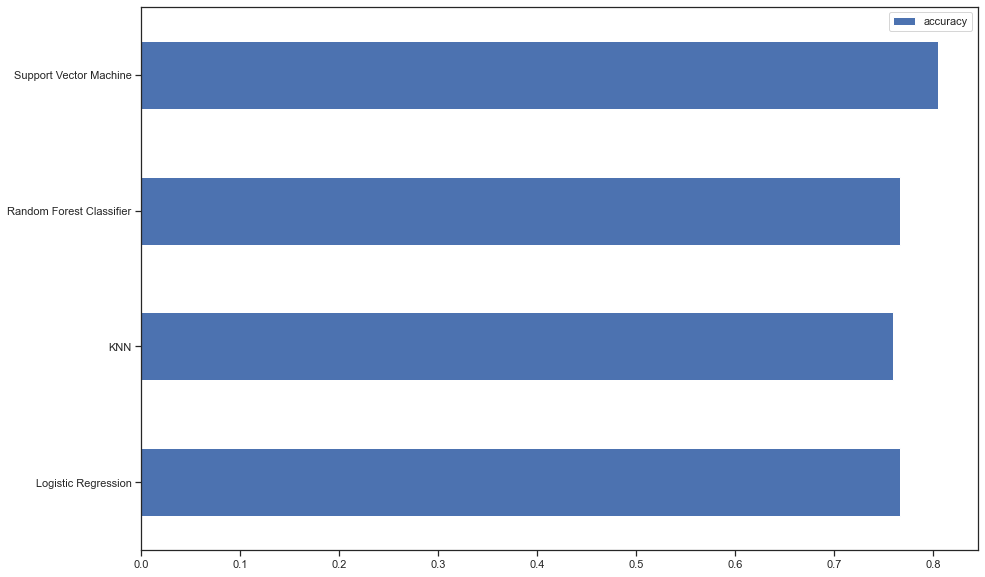

In [202]:
# visualizing the training performance of all models

model_compare = pd.DataFrame({"Logistic Regression" : log_reg, "KNN" : knn, "Random Forest Classifier" :clf, " Support Vector Machine" : svm,}, index =["accuracy"])

model_compare.T.plot.barh(figsize=(15,10));

In [203]:

model_compare


Logistic Regression      KNN  Random Forest Classifier  \
accuracy             0.766234  0.75974                  0.766234   

           Support Vector Machine  
accuracy                 0.805195

We can see that both Logistic Regression and Random Forest Classifier are performing very well at an accuracy of 75%. We can improve the accuracy more using HyperParameter tuning.

Hyperparameter tuning using RandomizedSearchcv


In [204]:
# Create a hyperparameter grid for LogisticRegression
from sklearn.model_selection import GridSearchCV
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

In [79]:
# Tune LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [205]:
score = rs_log_reg.score(X_test,y_test)
score

0.8051948051948052

Using Grid Search CV Logistic Regression



In [206]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [207]:
log_reg_grid = {'C' :np.logspace(-4, 4, 30), "solver" : ["liblinear"]} 

# set up the gridcv
gs_log_reg= GridSearchCV(LogisticRegression(), param_grid=log_reg_grid, cv=5,
verbose=True)

# fit grid search cv
gs_log_reg.fit(X_train, y_train)
score = gs_log_reg.score(X_test, y_test)
print(score*100)



Fitting 5 folds for each of 30 candidates, totalling 150 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
76.62337662337663
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.7s finished


In [208]:
gs_log_reg.score(X_test, y_test)

0.7662337662337663

Evaluating the tuned model by RandomizedSearchcv


In [210]:
y_preds = gs_log_reg.predict(X_test)
y_preds


array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0],
      dtype=int64)

In [211]:
np.array(y_test)

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0],
      dtype=int64)

In [212]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve


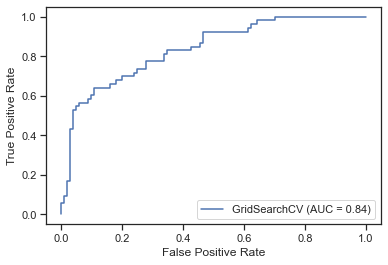

In [213]:
# plot ROC curve
plot_roc_curve(gs_log_reg,X_test,y_test)

In [215]:
#COnfusion matrix
print(confusion_matrix(y_test,y_preds))

[[83 18]
 [18 35]]


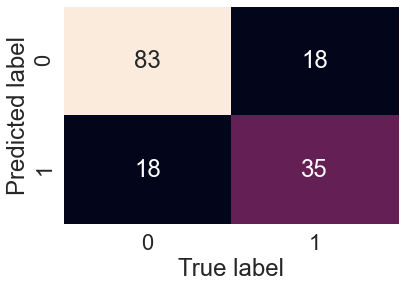

In [216]:
# confusion matrix
sns.set(font_scale=2)
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_preds), annot=True,cbar=False, fmt='g')
plt.xlabel("True label")
plt.ylabel("Predicted label");


In [219]:
#accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_preds))

0.7662337662337663


In [90]:
#classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.72      0.95      0.82        92
           1       0.85      0.45      0.59        62

    accuracy                           0.75       154
   macro avg       0.78      0.70      0.70       154
weighted avg       0.77      0.75      0.73       154



In [91]:

# Check best hyperparameters
gs_log_reg.best_params_

{'C': 9.236708571873866, 'solver': 'liblinear'}

In [92]:

# Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")


In [93]:
# Cross-validated accuracy
from sklearn.model_selection import cross_val_score
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=10,
                         scoring="accuracy")
cv_acc

array([0.75324675, 0.75324675, 0.74025974, 0.71428571, 0.71428571,
       0.75324675, 0.76623377, 0.80519481, 0.71052632, 0.78947368])

In [94]:
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

clf.fit(X_train, y_train);


In [95]:
cv_acc = np.mean(cv_acc)
cv_acc

0.75

In [96]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=10,
                         scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.7142036215119739

In [97]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=10,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.48091168091168085

In [98]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=10,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1


0.569372018074834

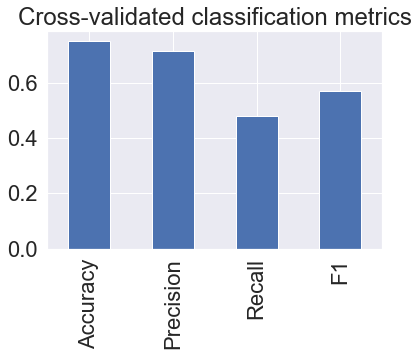

In [99]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

In [100]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

clf.fit(X_train, y_train);


In [102]:
clf.coef_


array([[ 1.08252192e-01,  2.25421514e-02, -1.92303031e-02,
         7.43119402e-04, -1.01030426e-05,  1.08475906e-02,
         3.25372386e-01, -8.13599900e-03]])

In [103]:
data = pd.read_csv("data\diabetes.csv")
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [104]:
feature_dict = dict(zip(data.columns, list(clf.coef_[0])))
feature_dict

{'Pregnancies': 0.10825219154127509,
 'Glucose': 0.02254215136141296,
 'BloodPressure': -0.01923030311022574,
 'SkinThickness': 0.0007431194024955275,
 'Insulin': -1.0103042623444685e-05,
 'BMI': 0.010847590620798483,
 'DiabetesPedigreeFunction': 0.3253723860993265,
 'Age': -0.008135998995369403}

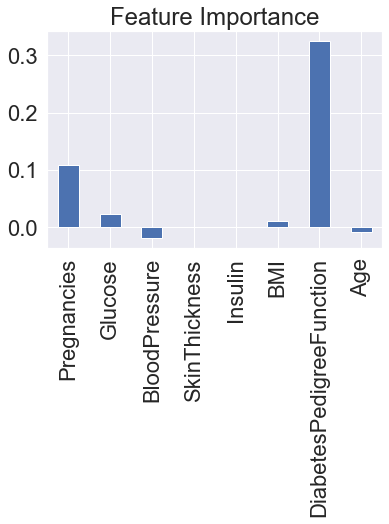

In [105]:

# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);


Loading and saving the model

In [133]:
import pickle

# Save trained model to file
pickle.dump(gs_log_reg, open("Diabetes.pkl", "wb"))


In [134]:
loaded_model = pickle.load(open("Diabetes.pkl", "rb"))
loaded_model.predict(X_test)
loaded_model.score(X_test,y_test)


0.7467532467532467

Predicting outcome with new data


In [140]:
data = pd.read_csv("data\diabetes.csv")
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [141]:
# data= data.dropna()
# data

In [142]:

## Enter the new data
X_test.head(2)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
649            0      107             60             25        0  26.4   
569            0      121             66             30      165  34.3   

     DiabetesPedigreeFunction  Age  
649                     0.133   23  
569                     0.203   33

In [146]:
Pregnancies = input()
Glucose = input()
BloodPressure = input()
SkinThickness = input()
Insulin = input()
BMI = input()
DiabetesPedigreeFunction = input()
Age = input()

In [147]:
row_df = pd.DataFrame([pd.Series([Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI ,DiabetesPedigreeFunction ,Age])])
row_df

0   1   2   3   4   5   6   7
0  2  34  56  34  34  54  33  23

In [148]:
prob = loaded_model.predict_proba(row_df)[0][1]
print(f"The probability of you having Diabetes is {prob}")

The probability of you having Diabetes is 0.9999999999788431


In [149]:
loaded_model.predict(row_df)[0]

1